## Overview 

The purpose of this project is to demonstrate knowledge of Exploratory Data Analysis (EDA) and the construction and evaluation of logistic regression models.
Logistic regression allows us to estimate the probability of a binary outcome, making it especially useful when modeling classification tasks using multiple predictors.

This project includes three main parts:
Part 1: EDA & Checking Model Assumptions
Part 2: Model Building and Evaluation
Part 3: Interpreting Model Results




------------------------------------------------------------------------------------------------------

## 1- PACE: Plan

necessary data packages for building regression models.

In [4]:
import pandas as pd
import numpy as np

# packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Load the dataset into a pandas DataFrame


In [5]:
data = pd.read_csv("/Users/sufyanalwjali/Desktop/Data analysis/Tik_Tok_Project-/tiktok_dataset.csv")

## 2- PACE: Analyze

The purposes of EDA before building a logistic regression model are:

1- To find problems in the data, like outliers or uneven class sizes.


2- To make sure the data meets model rules, like no strong overlap between variables (multicollinearity).


In [6]:
data.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


Get the number of rows and columns in the dataset.

In [7]:
data.shape

(19382, 12)

Basic descriptive statistics about the dataset.

In [8]:
# Get summary statistics
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Get the data types of the columns.

In [9]:
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Check for and handle missing values.

In [10]:
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

Drop rows with missing values

In [11]:
data = data.dropna(axis=0)

Check for and handle duplicates.

In [12]:
data.duplicated().sum()

0

Check for and handle outliers.

Create a boxplot to visualize distribution of `video_duration_sec` , `video_view_count`,`video_like_count` and `video_comment_count`


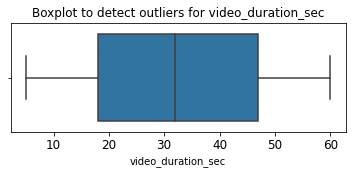

In [13]:
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_duration_sec', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_duration_sec'])
plt.show()

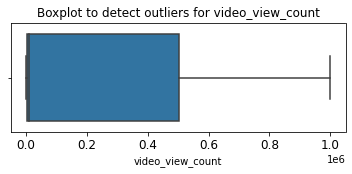

In [14]:
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_view_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_view_count'])
plt.show()

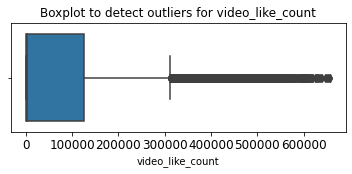

In [15]:
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_like_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_like_count'])
plt.show()

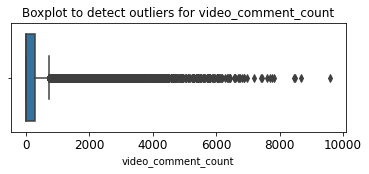

In [16]:
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_comment_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_comment_count'])
plt.show()

Let's Check and handle outliers


In [17]:
percentile25 = data["video_like_count"].quantile(0.25)
percentile75 = data["video_like_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

data.loc[data["video_like_count"] > upper_limit, "video_like_count"] = upper_limit

In [18]:
percentile25 = data["video_comment_count"].quantile(0.25)
percentile75 = data["video_comment_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

data.loc[data["video_comment_count"] > upper_limit, "video_comment_count"] = upper_limit

Check class balance.

In [19]:
data["verified_status"].value_counts(normalize=True)

not verified    0.93712
verified        0.06288
Name: verified_status, dtype: float64

Approximately 94.2% of the videos are from unverified accounts, while only 5.8% are from verified accounts. This means the outcome variable is imbalanced, which could affect model performance.

I am going to use resampling to create class balance in the outcome variable ! 

In [20]:
data_majority = data[data["verified_status"] == "not verified"]
data_minority = data[data["verified_status"] == "verified"]

# Upsample the minority class (which is "verified")
data_minority_upsampled = resample(data_minority,
                                 replace=True,                 # to sample with replacement
                                 n_samples=len(data_majority), # to match majority class
                                 random_state=0)               # to create reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

# Display new class counts
data_upsampled["verified_status"].value_counts()

not verified    17884
verified        17884
Name: verified_status, dtype: int64

In [21]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
data_upsampled[["verified_status", "video_transcription_text"]].groupby(by="verified_status")[["video_transcription_text"]].agg(func=lambda array: np.mean([len(text) for text in array]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


Let's get the average video_transcription_text length for videos posted by verified accounts and the average video_transcription_text length for videos posted by unverified accounts.

In [22]:
data_upsampled[["verified_status", "video_transcription_text"]].groupby(by="verified_status")[["video_transcription_text"]].agg(func=lambda array: np.mean([len(text) for text in array]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


No i am going to Extract the length of each video_transcription_text and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [23]:
data_upsampled["text_length"] = data_upsampled["video_transcription_text"].apply(func=lambda text: len(text))

In [24]:
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Visualize the distribution of video_transcription_text length for videos posted by verified accounts and videos posted by unverified accounts.

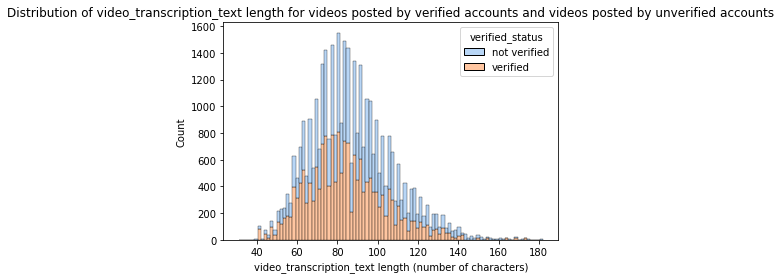

In [25]:
sns.histplot(data=data_upsampled, stat="count", multiple="stack", x="text_length", kde=False, palette="pastel", 
             hue="verified_status", element="bars", legend=True)
plt.title("Seaborn Stacked Histogram")
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for videos posted by verified accounts and videos posted by unverified accounts")
plt.show()

Check correlations:

Create a correlation matrix to quickly identify which variables are most strongly related to each other

In [26]:
numeric_data = data_upsampled.select_dtypes(include=[np.number])
numeric_data.corr()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.626385,-0.504015,-0.487096,-0.608773,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.005993,0.010515,0.008753,0.012674,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004494,0.002206,0.003989,-0.001086,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.856937,0.711313,0.690048,0.748361,0.244693
video_like_count,-0.626385,0.005993,0.004494,0.856937,1.000000,0.832146,0.805543,0.818032,0.216693
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.832146,1.000000,0.710117,0.671335,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.805543,0.710117,1.000000,0.793668,0.173396
video_comment_count,-0.608773,0.012674,-0.001086,0.748361,0.818032,0.671335,0.793668,1.000000,0.217661
text_length,-0.193677,-0.007083,-0.002981,0.244693,0.216693,0.171651,0.173396,0.217661,1.000000


Apply this correlation heatmap of the data.

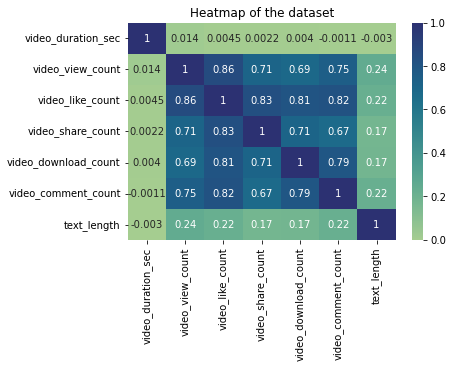

In [27]:
 
sns.heatmap(
    data_upsampled[["video_duration_sec", "video_view_count", 
                    "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "text_length"]]
    .select_dtypes(include=[np.number])
    .corr(), 
    annot=True, 
    cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

The heatmap shows a strong correlation between video_view_count and video_like_count (correlation = 0.86).

Since logistic regression assumes no multicollinearity, it's a good idea to exclude video_like_count to avoid redundancy. You can keep video_view_count, video_share_count, video_download_count, and video_comment_count as features for the model.

## 3- PACE: Construct

After analyzing the data and identifying key relationships between variables, it's now time to begin building the logistic regression model.

Now i am going to Select variables and Select the outcome variable.

In [28]:
y = data_upsampled["verified_status"]

In [29]:
#features
X = data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]

Here i am going to Split the data into training and testing sets.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26826, 7), (8942, 7), (26826,), (8942,))

The training and testing sets are properly aligned:

Number of features: 7 in both training and testing sets.

Training data: 26,826 rows.

Testing data: 8,942 rows.

The feature and target variable dimensions match in both sets, confirming the data is ready for modeling.

In [32]:
X_train.dtypes


video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [33]:
X_train["claim_status"].unique()


array(['opinion', 'claim'], dtype=object)

In [34]:
X_train["author_ban_status"].unique()


array(['active', 'under review', 'banned'], dtype=object)

The features claim_status and author_ban_status are currently of type object. To use them in scikit-learn models, they need to be converted to numeric format.
A common approach is to apply one-hot encoding to handle these categorical variables.

Encode categorical features in the training set using an appropriate method.

In [35]:
X_train_to_encode = X_train[["claim_status", "author_ban_status"]]

X_train_to_encode.head()

,claim_status,author_ban_status
33058,opinion,active
20491,opinion,active
25583,opinion,active
18474,opinion,active
27312,opinion,active


In [36]:
# Set up an encoder for one-hot encoding the categorical features
X_encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the training features using the encoder
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)
# feature names from encoder
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [37]:
X_train_encoded


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

 Place encoded training features (which is currently an array) into a dataframe


In [38]:
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [39]:
X_train.drop(columns=["claim_status", "author_ban_status"]).head()


,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
33058,33,2252.0,23.0,4.0,0.0
20491,52,6664.0,550.0,53.0,2.0
25583,37,6327.0,257.0,3.0,0.0
18474,57,1702.0,28.0,0.0,0.0
27312,21,3842.0,101.0,1.0,0.0


To prepare the final training data:

1- Concatenate X_train (with dropped categorical columns) and X_train_encoded_df (the one-hot encoded variables).

2- Use .reset_index(drop=True) to align indices across all DataFrames before concatenation.

This ensures that all features are properly combined in X_train_final with no index mismatch.

In [40]:
X_train_final = pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_train_encoded_df], axis=1)

# Display first few rows
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,33,2252.0,23.0,4.0,0.0,1.0,0.0,0.0
1,52,6664.0,550.0,53.0,2.0,1.0,0.0,0.0
2,37,6327.0,257.0,3.0,0.0,1.0,0.0,0.0
3,57,1702.0,28.0,0.0,0.0,1.0,0.0,0.0
4,21,3842.0,101.0,1.0,0.0,1.0,0.0,0.0


Check the data type of the outcome variable.

In [41]:
y_train.dtype

dtype('O')

In [42]:
y_train.unique()

array(['verified', 'not verified'], dtype=object)

As shown above, the outcome variable (claim_status) is currently of type object. To prepare it for modeling, it needs to be converted to numeric.

Use label encoding or one-hot encoding to transform the categorical values in the training set into numeric format.

In [43]:
y_encoder = OneHotEncoder(drop='first', sparse=False)

In [44]:
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Display the encoded training outcome variable
y_train_final

array([1., 1., 1., ..., 1., 1., 0.])

Now let's try and Construct a model (logistic regression model) and fit it to the training set.

In [45]:
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_final)

## 4- PACE: Execute


Before evaluating the model:

Encode categorical features in the testing set using the same method applied to the training set (e.g., one-hot encoding).

Ensure the encoded columns match between training and testing sets to maintain consistency.


In [46]:
#Testing features that needs to be encoded
X_test_to_encode = X_test[["claim_status", "author_ban_status"]]

# Display first few rows
X_test_to_encode.head()

,claim_status,author_ban_status
21061,opinion,active
31748,opinion,active
20197,claim,active
5727,claim,active
11607,opinion,active


In [ ]:
# Transform the testing features  
X_test_encoded = X_encoder.transform(X_test_to_encode)

X_test_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [48]:
# Place encoded testing features into a dataframe
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())

X_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [49]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_test.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
21061,41,2118.0,57.0,5.0,2.0
31748,27,5701.0,157.0,1.0,0.0
20197,31,449767.0,75385.0,5956.0,728.5
5727,19,792813.0,56597.0,5146.0,728.5
11607,54,2044.0,68.0,19.0,2.0


In [50]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
X_test_final = pd.concat([X_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_test_encoded_df], axis=1)

# Display first few rows
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,41,2118.0,57.0,5.0,2.0,1.0,0.0,0.0
1,27,5701.0,157.0,1.0,0.0,1.0,0.0,0.0
2,31,449767.0,75385.0,5956.0,728.5,0.0,0.0,0.0
3,19,792813.0,56597.0,5146.0,728.5,0.0,0.0,0.0
4,54,2044.0,68.0,19.0,2.0,1.0,0.0,0.0


Use the trained logistic regression model to make predictions on the encoded testing set

In [51]:
y_pred = log_clf.predict(X_test_final)


In [53]:
y_pred


array([1., 1., 0., ..., 1., 0., 1.])

In [52]:
y_test

21061        verified
31748        verified
20197        verified
5727     not verified
11607    not verified
             ...     
14756    not verified
26564        verified
14800    not verified
35705        verified
31060        verified
Name: verified_status, Length: 8942, dtype: object

Encode the true labels of the testing set so it can be compared to the predictions.

In [54]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# Display the encoded testing outcome variable
y_test_final

array([1., 1., 1., ..., 0., 1., 1.])

Before evaluation, confirm that the training and testing sets are aligned:

In [55]:
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape


((26826, 8), (26826,), (8942, 8), (8942,))

The data is correctly aligned:

Number of features: 8 in both training and testing sets

Training set: 26,826 rows
Testing set: 8,942 rows

Feature and target variable dimensions match, confirming the data is ready for model evaluation.

Now i would like to visualize the results of the logistic regression model.

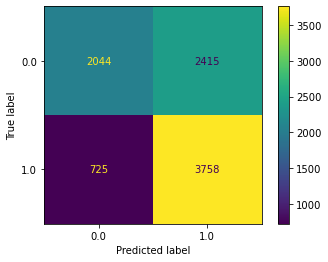

In [56]:
log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)
log_disp.plot()
plt.show()

- Top-left (True Negatives): Correctly predicted unverified accounts

- Top-right (False Positives): Unverified accounts incorrectly predicted as verified

- Bottom-left (False Negatives): Verified accounts incorrectly predicted as unverified

- Bottom-right (True Positives): Correctly predicted verified accounts

A perfect model would have only true positives and true negatives, with no false positives or false negatives.

Let's see and create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [57]:
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.46      0.57      4459
not verified       0.61      0.84      0.71      4483

    accuracy                           0.65      8942
   macro avg       0.67      0.65      0.64      8942
weighted avg       0.67      0.65      0.64      8942



Note: The classification report shows the logistic regression model achieved:

- Precision: 61%
- Recall: 84%
- Accuracy: 65%

These scores are based on the "not verified" class, which is the primary target of interest. The "verified" class has separate metrics, and the weighted average reflects overall model performance across both classes.

#### Interpret model coefficients

In [59]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})
 

,Feature Name,Model Coefficient
0,video_duration_sec,8.607893e-03
1,video_view_count,-2.132079e-06
2,video_share_count,5.930971e-06
3,video_download_count,-1.099775e-05
4,video_comment_count,-6.404235e-04
5,claim_status_opinion,3.908384e-04
6,author_ban_status_banned,-1.781741e-05
7,author_ban_status_under review,-9.682447e-07


#### Conclusion 
The dataset contained some highly correlated features, so we dropped video_like_count to reduce multicollinearity.

According to the logistic regression model, each additional second of video length increases the log-odds of being a verified account by 0.009.

Model performance was moderate: 61% precision, 84% recall, and 65% accuracy—acceptable, though with room for improvement.

##### results can be presented from this project :

I built a logistic regression model to predict verified status using video features. The model showed moderate predictive power. Longer videos were associated with higher odds of being verified, while other features had minimal impact based on their smaller coefficients.
